In [1]:
import pandas as pd
from my_fun import summary_result
from my_fun import plot_result_mergecv

# plot regression results:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

# scatter_data_ridge = pd.read_csv("result/allsubjects/scatter_data_ridge.csv", sep = ",", header = 0, )
# scatter_data_svr = pd.read_csv("result/allsubjects/scatter_data_svr.csv", sep = ",", header = 0, )
# scatter_data_gpr = pd.read_csv("result/allsubjects/scatter_data_gpr.csv", sep = ",", header = 0, )
# scatter_data_dnn = pd.read_csv("result/allsubjects/scatter_data_dnn.csv", sep = ",", header = 0, )

scatter_data_ridge = pd.read_csv("result/allsubjects/out02_scatter_data_gender_ridge.csv", sep = ",", header = 0, )
scatter_data_svr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_svr.csv", sep = ",", header = 0, )
scatter_data_gpr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_gpr.csv", sep = ",", header = 0, )
scatter_data_dnn = pd.read_csv("result/allsubjects/out02_scatter_data_gender_dnn.csv", sep = ",", header = 0, )

result_table_ridge = pd.read_csv("result/result_table_ridge.csv", sep = ",", header = [0,1], index_col = 0)
result_table_ridge, temp = summary_result(result_table_ridge)
result_table_svr = pd.read_csv("result/result_table_svr.csv", sep = ",", header = [0,1], index_col = 0)
result_table_svr, temp = summary_result(result_table_svr)
result_table_gpr = pd.read_csv("result/result_table_gpr.csv", sep = ",", header = [0,1], index_col = 0)
result_table_gpr, temp = summary_result(result_table_gpr)
result_table_dnn = pd.read_csv("result/result_table_dnn.csv", sep = ",", header = [0,1], index_col = 0)
result_table_dnn, temp = summary_result(result_table_dnn)

In [2]:
scatter_data_ridge.head()

,feature,SUBJID,CV,chronological age,brain age,Sex,brain age fit sex,brain age fit intersex,brain age fit
0,ALFF,601249791321,7,9.0,10.461285,F,11.000625,11.141371,10.813930
1,ALFF,601155992510,8,16.0,14.264945,M,15.213962,15.266611,15.429108
2,ALFF,606939668352,6,18.0,13.891279,F,16.318838,16.043166,16.159106
3,ALFF,609025109832,5,21.0,16.289315,F,16.900463,16.030567,16.763582
4,ALFF,608414632504,1,10.0,10.395401,M,11.469968,11.256257,11.669449


In [3]:
def combine_scatter_data(data_list, feature = 'Multi-modal'):
    out_data_list = []
    for i in range(len(data_list)):
        plot_data = data_list[i]
        plot_data = plot_data.set_index(['feature']).sort_index()
        plot_data = plot_data.loc[feature,:]
        plot_data['age gap'] = -plot_data['chronological age']+plot_data['brain age']
        #plot_data['age gap corr'] = -plot_data['brain age fit sex']+plot_data['brain age']
        plot_data['age gap intercorr'] = -plot_data['brain age fit intersex']+plot_data['brain age']
        out_data_list.append(plot_data)
        
    out_data = pd.concat(out_data_list, keys = ['Ridge', 'SVR', 'GPR', 'DNN'], sort = True)
    return(out_data)

def combine_result_table(data_list, feature = 'Multi-modal'):
    out_data_list = []
    for i in range(len(data_list)):
        plot_data = data_list[i]
        plot_data = plot_data.loc[feature,:]
        out_data_list.append(plot_data)
        
    out_data = pd.concat(out_data_list, keys = ['Ridge', 'SVR', 'GPR', 'DNN'], sort = True)
    return(out_data)

In [4]:
scatter_data_list = [scatter_data_ridge, scatter_data_svr, scatter_data_gpr, scatter_data_dnn]
scatter_data = combine_scatter_data(scatter_data_list)
# scatter_data['CV'].value_counts()

In [5]:
result_table_list = [result_table_ridge, result_table_svr, result_table_gpr, result_table_dnn]
result_table = combine_result_table(result_table_list)

In [6]:
regplot_color = ['r', 'g', 'y', 'b']
text_size = 35

def plot_all(result_table_summary, plot_data, 
             row_order = ['brain age', 'age gap', 'age gap corr']):
    
    method_name = plot_data['Method'].unique()
    variable_name = plot_data['variable'].unique()
    
    result_table_summary = result_table_summary.sort_index()
    
    g = sns.lmplot(x='chronological age', y='value', hue = 'CV', col = 'Method', row = 'variable', \
                   row_order = row_order, data = plot_data, fit_reg=False, sharex = True, sharey = False,\
                   scatter_kws={'alpha':0.6}, x_jitter = .2,\
                   height=10.27, aspect=10.27/10.27, legend = False)
    g.axes[0,0].set_xlim(6.5, 23.5)
    
    
    for i_row in range(len(row_order)):
        sub_plot = 0
        for i_method in method_name:
            g.axes[i_row, sub_plot].set_ylim(5.5, 21.5)
            i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & \
                                        (plot_data['variable']==row_order[i_row]),:]
            
            if i_row==0:
                label1 = "$R^2$ = %.3f, MAE = %.3f" % \
                (result_table_summary.loc[(i_method, 'R square')]['mean'], \
                 result_table_summary.loc[(i_method, 'MAE')]['mean'])
                text_y = 20
                fit_order = 2
            else:
                corr = np.corrcoef(i_plot_data['value'].values, 
                                   i_plot_data['chronological age'].values)
                label1 = "r = %.3f" % corr[0,1]
                text_y = 6
                fit_order = 1
                g.axes[i_row, sub_plot].set_ylim(-6.5, 7)

            
            sns.regplot(x='chronological age', y='value', \
                        data = i_plot_data, scatter=False, ax=g.axes[i_row, sub_plot], \
                        order = fit_order, color = regplot_color[sub_plot])

            #text_y = plot_data['brain age'].max()
            g.axes[i_row, sub_plot].text(8, text_y, label1, fontsize = text_size)

            g.axes[i_row, sub_plot].set_title(i_method)
            if i_row<len(row_order)-1:
                g.axes[i_row, sub_plot].set_xlabel('')

            if sub_plot == 0:
                g.axes[i_row, sub_plot].set_ylabel(row_order[i_row])
            else:
                g.axes[i_row, sub_plot].set_ylabel('')
                g.axes[i_row, sub_plot].set(yticklabels=[])
            sub_plot = sub_plot + 1

In [7]:

scatter_data2 = scatter_data.reset_index()
scatter_data2.rename(columns = {'level_0': 'Method'}, inplace = True)
# scatter_data2['age gap corr'] = scatter_data2['brain age'] - scatter_data2['brain age fit']


In [8]:
# scatter_data_melt = pd.melt(scatter_data2, id_vars = ['Method', 'CV', 'chronological age'], 
#                             value_vars = ['brain age', 'age gap', 'age gap corr'])

scatter_data_melt = pd.melt(scatter_data2, id_vars = ['Method', 'CV', 'chronological age', 'Sex'], 
                            value_vars = ['brain age', 'age gap', 'age gap corr'])

C:\Users\Xin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


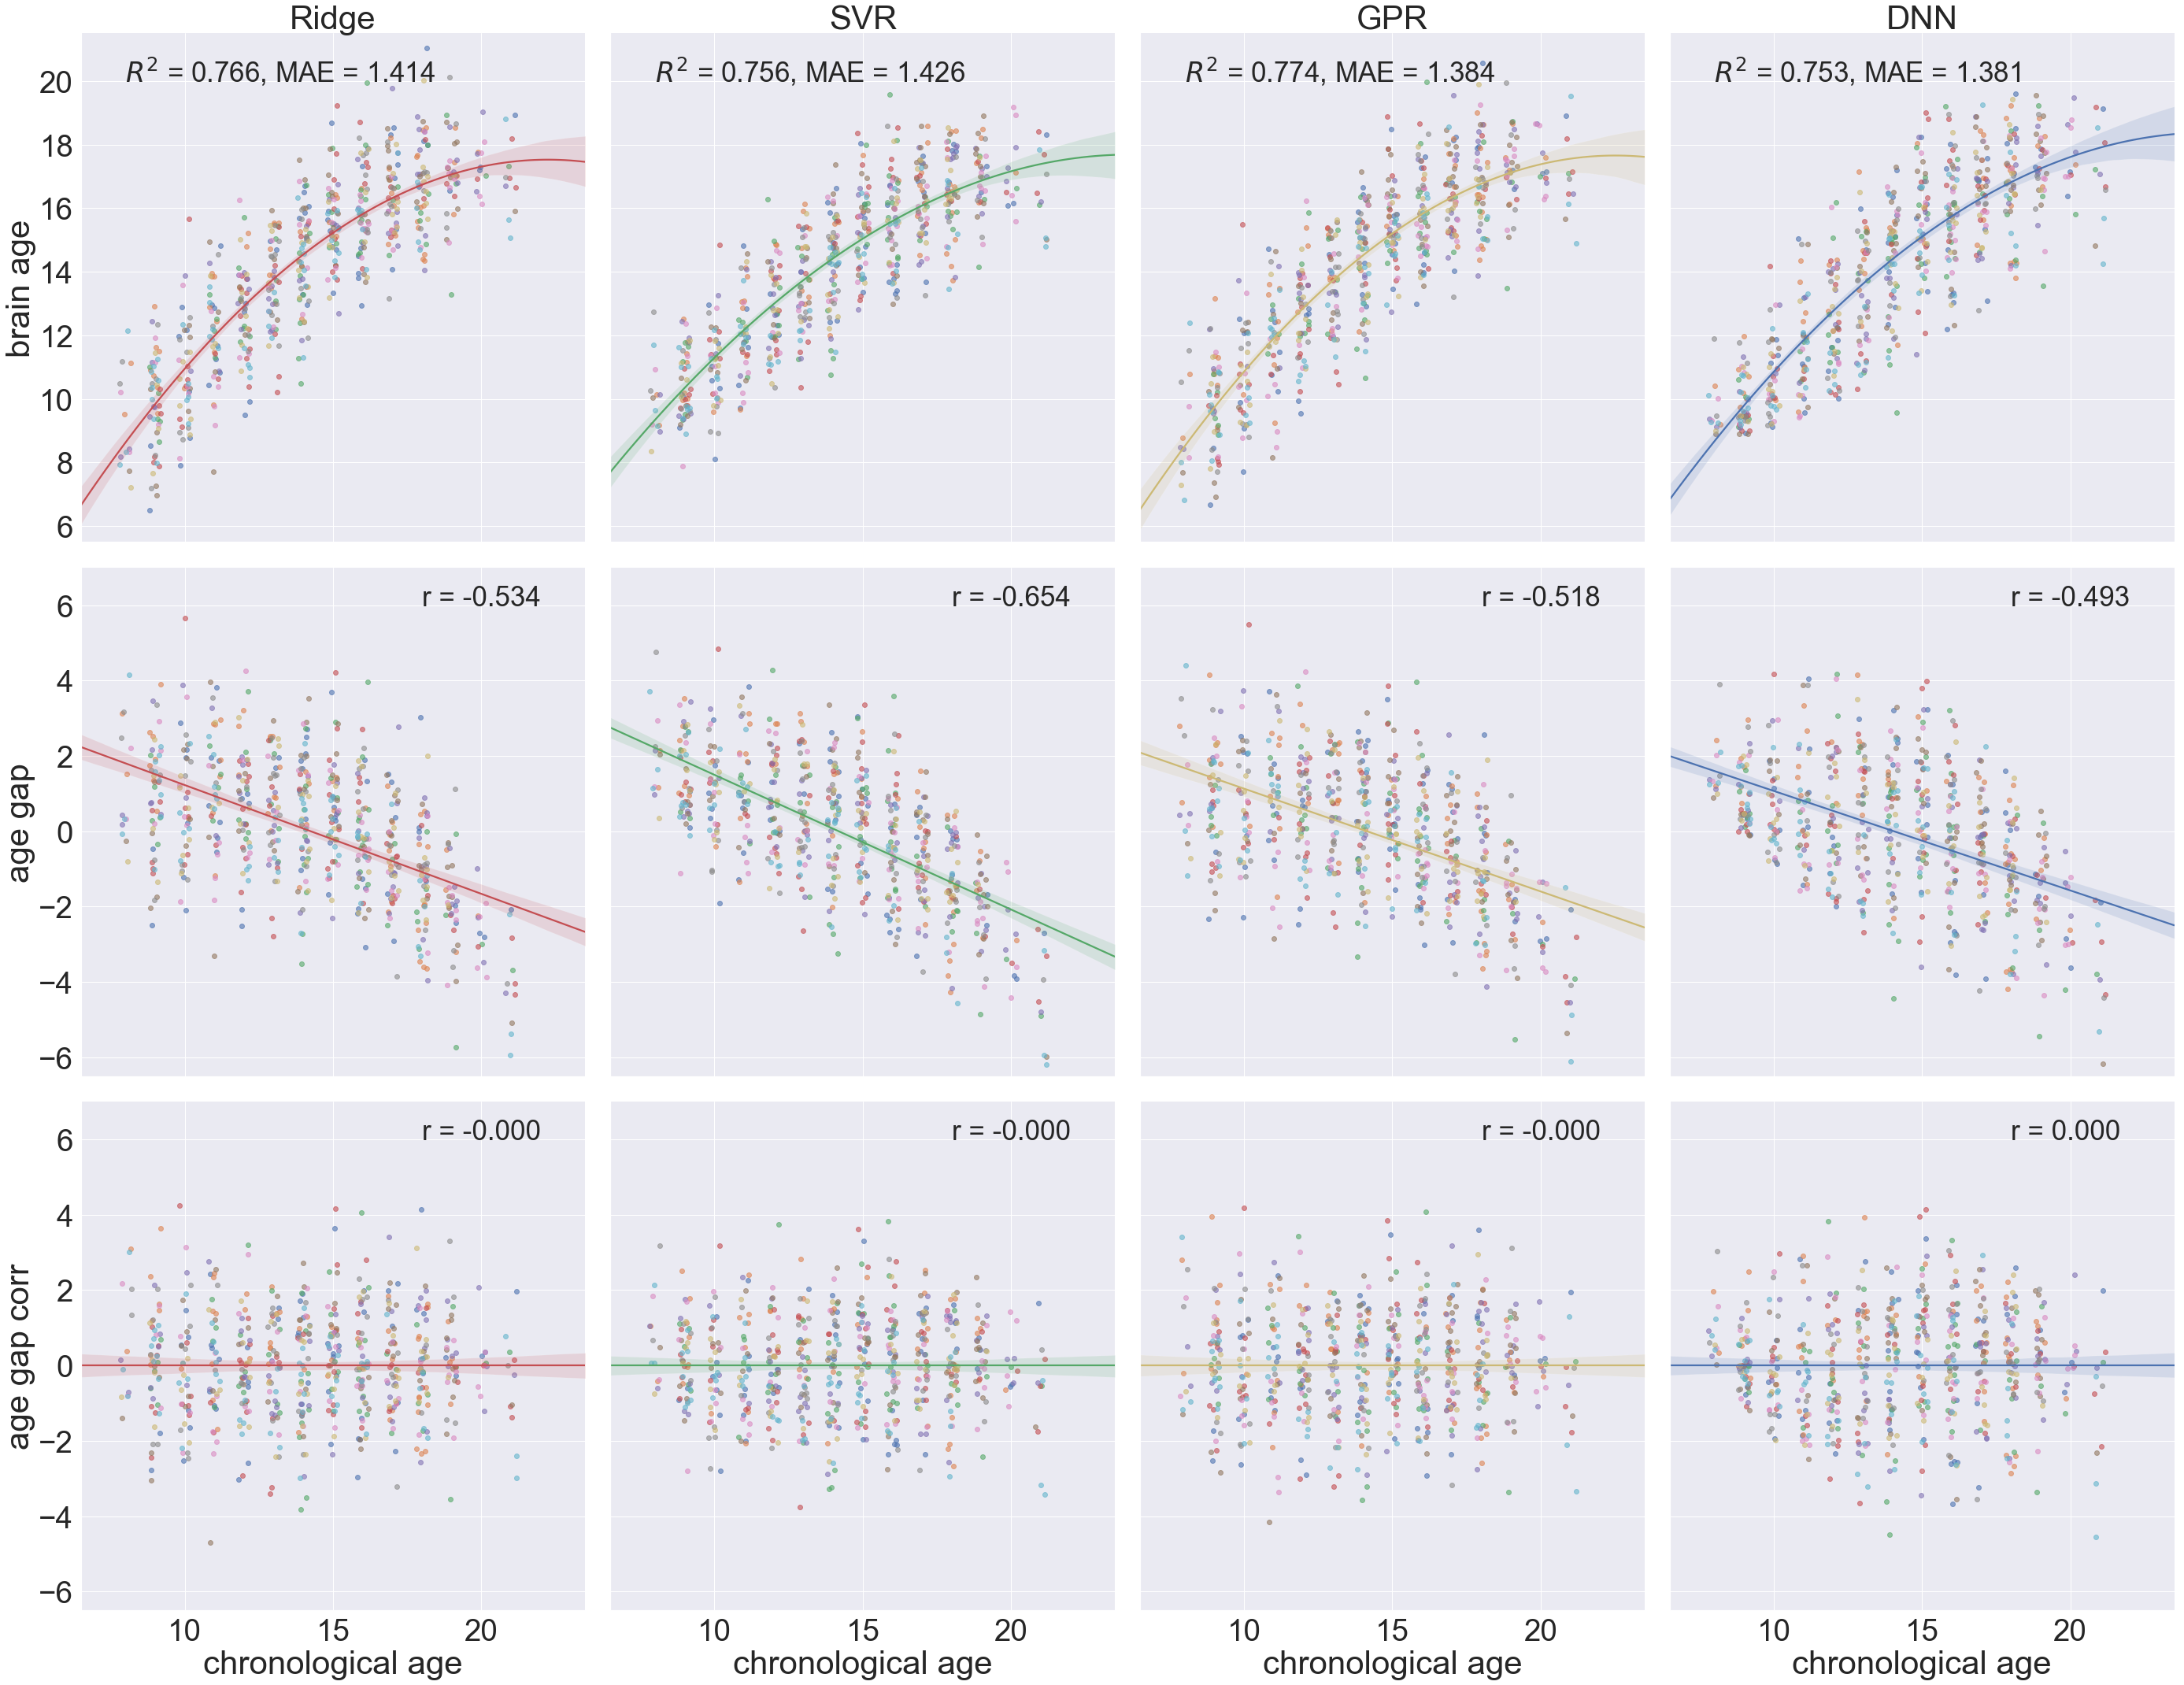

In [9]:
# sns.set(rc={'figure.figsize':(15, 15)}, font_scale = 4)
sns.set(font_scale = 3.5)
plot_all(result_table, scatter_data_melt)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.savefig('figure/figure2_scatter_merge.png', dpi=300)

In [10]:
from my_fun import qudratic_r_squared

text_size = 35
# colors = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["amber"], ]
colors = sns.color_palette("RdBu_r", 7)
colors = [colors[5], colors[1]]

scatter_para = {'alpha': 0.9, 's': 3, 'linewidth': 0.1}

def plot_result_gender( plot_data):

    method_name = plot_data['Method'].unique()
    variable_name = plot_data['variable'].unique()
    
#     result_table_summary = result_table_summary.sort_index()
    
    g = sns.lmplot(x='chronological age', y='value', hue = 'Sex', col = 'Method', row = 'variable', \
                   row_order = ['brain age','age gap', 'age gap corr'], palette = colors, \
                   data = plot_data, fit_reg=False, sharex = True, sharey = False, order = 2, \
                   scatter_kws={'alpha':0.6}, x_jitter = .2,\
                   height=10.27, aspect=10.27/10.27, legend = True)
    
    g.axes[0,0].set_xlim(6.5, 23.5)
    
    plt.setp(g._legend.get_title(), fontsize=45)
    for lh in g._legend.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [250] 
    
    sub_plot = 0
    for i_method in method_name:

        i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & (plot_data['variable']=='brain age'),:]
        
        chro_age_m = i_plot_data.loc[(i_plot_data['Sex']=='M','chronological age')].values
        chro_age_f = i_plot_data.loc[(i_plot_data['Sex']=='F','chronological age')].values
        
        brain_age_m = i_plot_data.loc[(i_plot_data['Sex']=='M','value')].values
        brain_age_f = i_plot_data.loc[(i_plot_data['Sex']=='F','value')].values
        
        # chronological age vs age gap:
        label2 = "Male: $R^2$ = %.3f, MAE = %.3f" % \
        (qudratic_r_squared(chro_age_m, brain_age_m),\
         np.mean(np.abs(chro_age_m - brain_age_m)))
        
        label1 = "Female: $R^2$ = %.3f, MAE = %.3f" % \
        (qudratic_r_squared(chro_age_f, brain_age_f),\
         np.mean(np.abs(chro_age_f - brain_age_f)))
        
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[0], \
                    data = i_plot_data.loc[(i_plot_data['Sex']=='M'),:], scatter=True, ax=g.axes[0, sub_plot], order = 2)
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[1],\
                    data = i_plot_data.loc[(i_plot_data['Sex']=='F'),:], scatter=True, ax=g.axes[0, sub_plot], order = 2)

        g.axes[0, sub_plot].text(8, 20.5, label1, fontsize = text_size)
        g.axes[0, sub_plot].text(8, 21.4, label2, fontsize = text_size)
        g.axes[0, sub_plot].set_ylim(5.5, 22.5)
        
        g.axes[0, sub_plot].set_title(i_method)
        g.axes[0, sub_plot].set_xlabel('')
        
        if sub_plot == 0:
            g.axes[0, sub_plot].set_ylabel('brain age')
        else:
            g.axes[0, sub_plot].set_ylabel('')
            g.axes[0, sub_plot].set(yticklabels=[])
        sub_plot = sub_plot + 1
    
    text_x = 14
    text_y1 = 5.5
    text_y2 = 6.2
    
    sub_plot = 0
    for i_method in method_name:
        
        i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & (plot_data['variable']=='age gap'),:]
        # chronological age vs brain age:
        chro_age_m = i_plot_data.loc[i_plot_data['Sex']=='M', 'chronological age'].values
        chro_age_f = i_plot_data.loc[i_plot_data['Sex']=='F', 'chronological age'].values
        
        age_gap_m = i_plot_data.loc[i_plot_data['Sex']=='M', 'value'].values
        age_gap_f = i_plot_data.loc[i_plot_data['Sex']=='F', 'value'].values
        
        corr_m = np.corrcoef(chro_age_m, age_gap_m)[0,1]
        corr_f = np.corrcoef(chro_age_f, age_gap_f)[0,1]
        # chronological age vs brain age:
        label2 = "Male: r = %.3f" % corr_m
        label1 = "Female: r = %.3f" % corr_f
        
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[0], \
                    data = i_plot_data.loc[i_plot_data['Sex']=='M',:], scatter=True, ax=g.axes[1, sub_plot], order = 1)
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[1],\
                    data = i_plot_data.loc[i_plot_data['Sex']=='F',:], scatter=True, ax=g.axes[1, sub_plot], order = 1)

        #text_y = plot_data['brain age'].max()+.2
        g.axes[1, sub_plot].text(text_x, text_y1, label1, fontsize = text_size)
        g.axes[1, sub_plot].text(text_x, text_y2, label2, fontsize = text_size)
        
        g.axes[1, sub_plot].set_title('')
        g.axes[1, sub_plot].set_xlabel('')
        g.axes[1,sub_plot].set_ylim(-6.5, 7)
        
        if sub_plot == 0:
            g.axes[1, sub_plot].set_ylabel('age gap')
        else:
            g.axes[1, sub_plot].set_ylabel('')
            g.axes[1, sub_plot].set(yticklabels=[])
        sub_plot = sub_plot + 1
        
    sub_plot = 0
    for i_method in method_name:
        
        i_plot_data = plot_data.loc[(plot_data['Method']==i_method) & (plot_data['variable']=='age gap corr'),:]
        # chronological age vs brain age:
        chro_age_m = i_plot_data.loc[i_plot_data['Sex']=='M', 'chronological age'].values
        chro_age_f = i_plot_data.loc[i_plot_data['Sex']=='F', 'chronological age'].values
        
        age_gap_m = i_plot_data.loc[i_plot_data['Sex']=='M', 'value'].values
        age_gap_f = i_plot_data.loc[i_plot_data['Sex']=='F', 'value'].values
        
        corr_m = np.corrcoef(chro_age_m, age_gap_m)[0,1]
        corr_f = np.corrcoef(chro_age_f, age_gap_f)[0,1]
        # chronological age vs brain age:
        label2 = "Male: cor r = %.3f" % corr_m
        label1 = "Female: cor r = %.3f" % corr_f
        
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[0], \
                    data = i_plot_data.loc[(i_plot_data['Sex']=='M'),:], scatter=True, ax=g.axes[2, sub_plot], order = 1)
        sns.regplot(x='chronological age', y='value', scatter_kws = scatter_para, color = colors[1],\
                    data = i_plot_data.loc[(i_plot_data['Sex']=='F'),:], scatter=True, ax=g.axes[2, sub_plot], order = 1)

        #text_y = plot_data['brain age'].max()+.2
        g.axes[2, sub_plot].text(text_x, text_y1, label1, fontsize = text_size)
        g.axes[2, sub_plot].text(text_x, text_y2, label2, fontsize = text_size)
        
        g.axes[2, sub_plot].set_title('')
        g.axes[2, sub_plot].set_ylim(-6.5, 7)
        
        if sub_plot == 0:
            g.axes[2, sub_plot].set_ylabel('age gap corr')
        else:
            g.axes[2, sub_plot].set_ylabel('')
            g.axes[2, sub_plot].set(yticklabels=[])
        sub_plot = sub_plot + 1
    

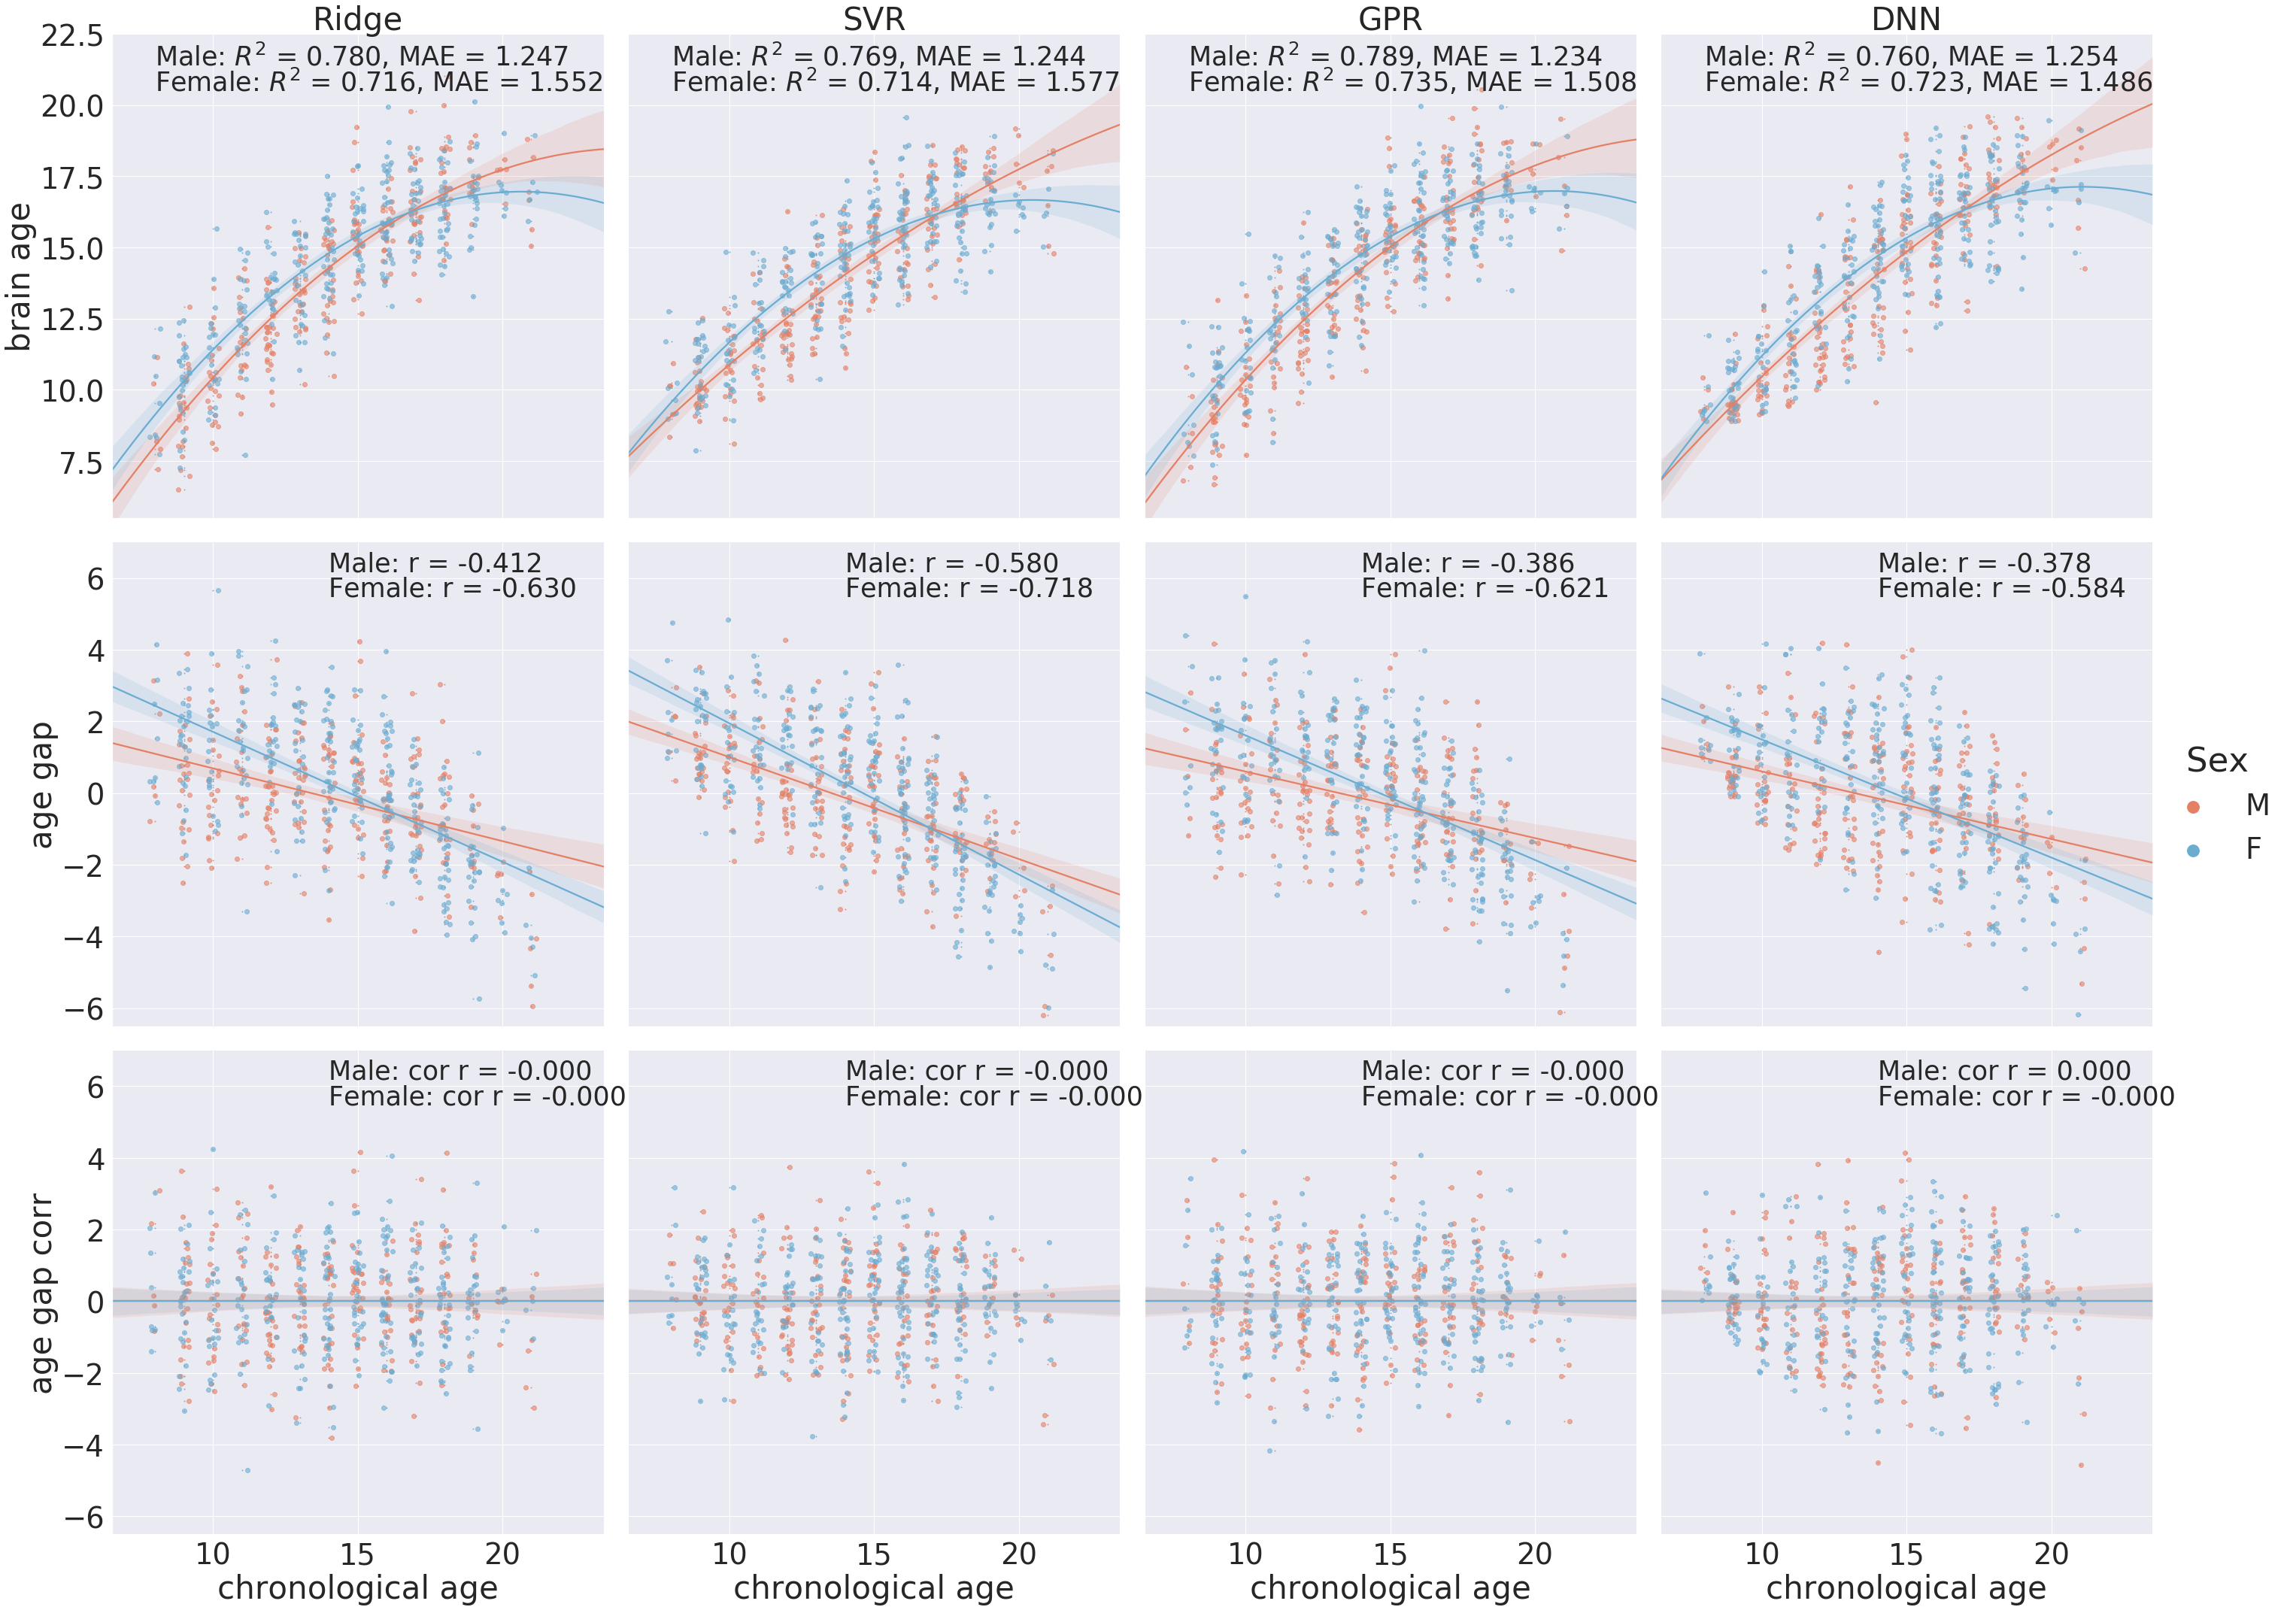

In [11]:
sns.set(font_scale = 3.5)
plot_result_gender(scatter_data_melt)
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig('figure/figure3_scatter_merge_gender_intersex.png', dpi=300)